# Mixtures of Gaussians

## Import library

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import make_blobs
import seaborn as sns
import matplotlib.mlab as mlab

## 単純ガウス分布 (1次元) の最尤推定

平均が $\mu$，分散が $\sigma^2$ である正規分布は
$p(x) = \dfrac{1}{\sqrt{2\pi \sigma^2}} \exp \left( - \dfrac{(x-\mu)^2}{2\sigma^2}\right)$なので，独立な変数$x_1,x_2,\cdots ,x_n $が得られる確率密度は
$$P(\boldsymbol{X};\mu,\sigma^2)=p(x_1)p(x_2)\cdots p(x_n).$$

尤度関数
$$L(\mu,\sigma^2)=p(x_1)p(x_2)\cdots p(x_n)=\prod_{k=1}^n \left\{ \frac{1}{\sqrt{2\pi \sigma^2}} \exp\left( -\frac{(x_k-\mu)^2}{2\sigma^2}\right)\right\}$$


 対数尤度関数は
 $$\log L(\mu,\sigma^2)=-\frac{n}{2}\log (2\pi\sigma^2)
 -\frac{1}{2\sigma^2} \sum_{k=1}^n (x_k-\mu)^2.$$
 最大値をとる必要条件は
 \begin{eqnarray}
\left\{
\begin{array}{l}
\dfrac{\partial}{\partial \mu} \log L(\mu,\sigma^2) 
= \dfrac{1}{\sigma^2} \displaystyle \sum_{k=1}^n (x_k-\mu)=0 \\
\dfrac{\partial}{\partial \sigma^2} \log L(\mu,\sigma^2)
= - \dfrac{n}{2\sigma^2}+\dfrac{1}{2\sigma^4} \displaystyle\sum_{k=1}^n (x_k-\mu)^2 = 0
\end{array}
\right.
\end{eqnarray}
すなわち
\begin{eqnarray}
\left\{
\begin{array}{l}
\mu = \dfrac{x_1+x_2+\cdots+x_n}{n}\\
\sigma^2 = \dfrac{1}{n}\displaystyle\sum_{k=1}^n(x_k-\mu)^2
\end{array}
\right.
\end{eqnarray}
十分性のチェックは略

### データの生成

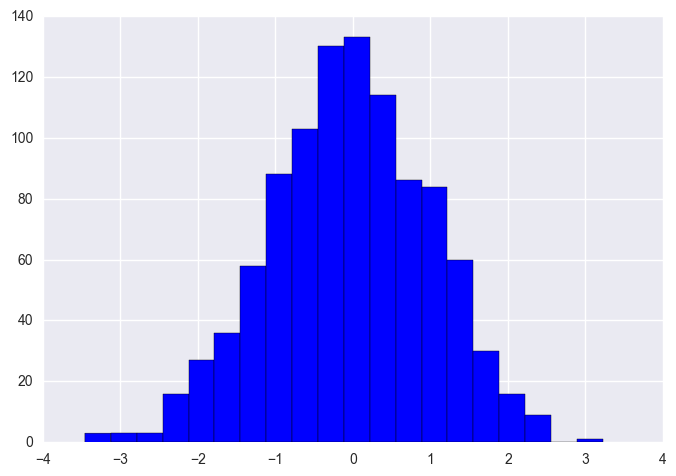

In [2]:
N = 1000
s = np.random.normal(loc=0.0,scale=1.0,size=N)
plt.hist(s, bins=20, color="blue")
plt.show()

In [3]:
def gauss(x, mu, sigma):
    """gauss ditribution
    Args: 
        x (np.array): x
        mu (float): mu
        sigma (float): sigma
    Returns:
        probability (np.array): probability
    """
    return np.exp(-(x - mu)**2 / (2*sigma** 2)) / np.sqrt(2*np.pi*sigma**2)

In [4]:
def gauss_vec(x, mu, sigma):
    """gauss ditribution
    Args: 
        x (np.array): x
        mu (np.array): mu
        sigma (np.array): sigma
    Returns:
        probability (np.array): probability
        
          new_label = np.array([
                np.array([
                    self._euclidean_distance(p, centroid) # 特徴量ベクトルとの距離
                    for centroid in centroids             # centroid を一つ取ってくる
                ]).argmin()                               # 距離最小を実現する centroid のインデックスを返す
                for p in features                         # 特徴量ベクトルすべてについて実行
            ])        
        
    """
    prob = np.array([
        np.exp(-(x - mu)**2 / (2*sigma** 2)) / np.sqrt(2*np.pi*sigma**2)
    ])
    return np.exp(-(x - mu)**2 / (2*sigma** 2)) / np.sqrt(2*np.pi*sigma**2)

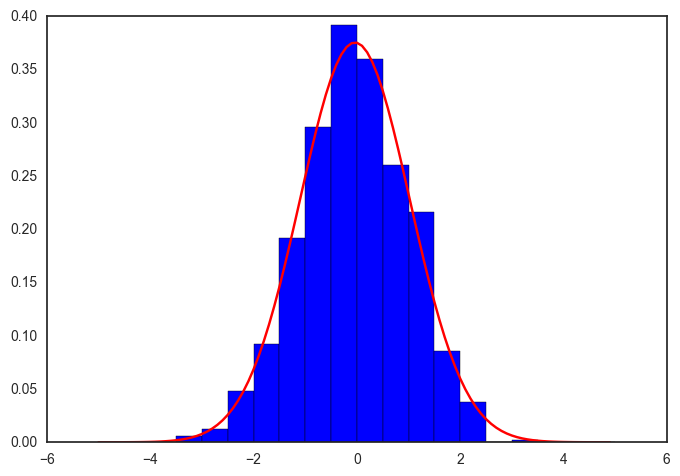

In [5]:
mu = s.sum()/N
sigma = ((s - mu)**2).sum()/N

x = np.arange(-5,5,0.1)
y = gauss(x, mu, sigma)
sns.set_style("white")

plt.hist(s, bins=20, range=(-5,5),normed=True,color="blue")
plt.plot(x,y,color="red")
plt.show()

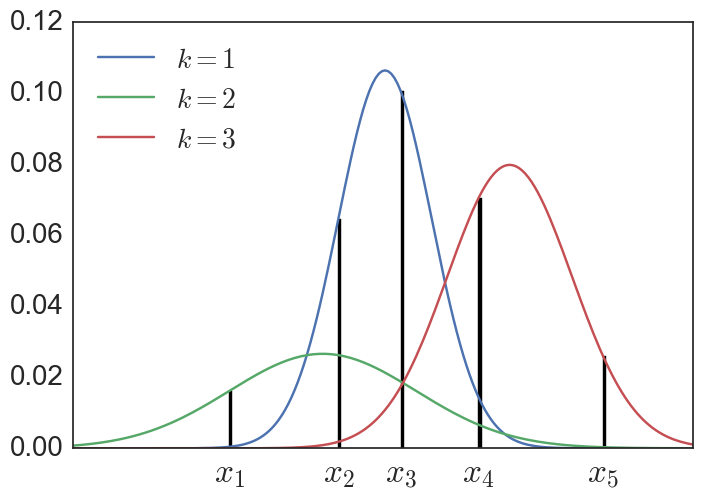

In [6]:
mu = [0.0,-2.0,4.0]
sigma = [1.5,3.0,2.0]
pi = [0.4,0.2,0.4]

x = np.arange(-10.0,10.0,0.1)

file_name = '3gaussian.png'
dpi=100

sns.set_style("white")
#plt.xticks([0])

#fig = plt.figure()
#ax = fig.gca()
#ax.set_xticks(np.arange(0, 10, 1)) 

for i in zip(mu,sigma,pi):
    y = i[2]*gauss(x, i[0], i[1])
#    plt.grid([0.0,5.0])
#    plt.xticks( [0.0, 5.0, 10.0] )
    plt.plot(x,y)
    plt.legend(["$k=1$", "$k=2$","$k=3$"],loc="upper left",fontsize=20)
    plt.tick_params(labelsize=20)
    
labels = ['$x_1$','$x_2$','$x_3$','$x_4$','$x_5$']    
x = [-5.0,-1.5,0.5,3.0,7.0]
y = np.array([
        np.array([
            i[2]*gauss(j,i[0],i[1])
            for i in zip(mu,sigma,pi)
        ]).max()
        for j in x
    ])

for i in range(0,5):
    plt.xticks(x,labels,fontsize=24)
    plt.bar(x[i], y[i], width=0.1, color='black')

plt.savefig(file_name,dpi=dpi)
plt.show()

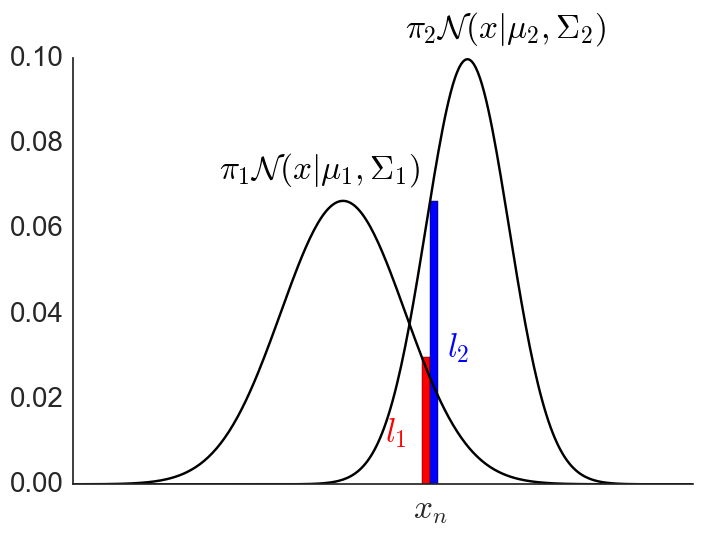

In [94]:
mu = [-2.0,4.0]
sigma = [3.0,2.0]
pi = [0.5,0.5]

x = np.arange(-15.0,15.0,0.1)

file_name = '2gaussian.png'
dpi=100

sns.set_style("white")
#plt.xticks([0])

#fig = plt.figure()
#ax = fig.gca()
#ax.set_xticks(np.arange(0, 10, 1)) 

for i in zip(mu,sigma,pi):
    y = i[2]*gauss(x, i[0], i[1])
#    plt.grid([0.0,5.0])
#    plt.xticks( [0.0, 5.0, 10.0] )
    plt.plot(x,y,c='black')
#    plt.legend(["$k=1$", "$k=2$","$k=3$"],loc="upper left",fontsize=20)
    plt.tick_params(labelsize=20)
    
labels = ['','$x_n$']   
x = [2.0-0.2,2.0+0.2]
y = [pi[0]*gauss(x[0],mu[0],sigma[0]),pi[1]*gauss(x[1],mu[1],sigma[1])]


plt.xticks(x,labels,fontsize=24)
plt.bar(x[0], y[0], width=0.4, color='red')
plt.bar(x[1], y[1], width=0.4, color='blue')

plt.text(0.0,0.01,"$l_1$",fontsize=24,color='red')
plt.text(3.0,0.03,"$l_2$",fontsize=24,color='blue')
plt.text(1.0,0.105,"$\pi_2 \mathcal{N}(x|\mu_2,\Sigma_2)$",fontsize=24,color='black')
plt.text(-8.0,0.072,"$\pi_1 \mathcal{N}(x|\mu_1,\Sigma_1)$",fontsize=24,color='black')

plt.gca().spines['right'].set_visible(False)
#plt.gca().spines['left'].set_visible(False)
#plt.gca().spines['bottom'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
#sns.plt.ax.axis("off")
#plt.axes.axes.get_yaxis().set_visible(False) j 

#plt.axes.set_yticklabels([])

plt.savefig(file_name,dpi=dpi)
plt.show()